### Import the libraries

In [102]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Data Manipulation 


#### Columns Names

In [36]:
# Read the .data file without delimiter and headers
df = pd.read_csv('data/german.data', delimiter='\s+', header=None)

# Define column names
nombres_columnas = ['chk_account',
                    'duration',
                    'credit_hist',
                    'purpose',
                    'credit_amount',
                    'savings_account',
                    'present_emp',
                    'installment_rate',
                    'personal_status_sex',
                    'other_debtors',
                    'present_residence',
                    'property',
                    'age',
                    'other_install',
                    'housing',
                    'number_credits',
                    'job',
                    'number_people',
                    'telephone',
                    'foreign_worker',
                    'response']

# Assign the column names to the DataFrame
df.columns = nombres_columnas

# Get the number of columns
num_columnas = df.shape[1]

# Print the number of columns
print("Número de columnas:", num_columnas)

Número de columnas: 21


In [38]:
df.head()

,chk_account,duration,credit_hist,purpose,credit_amount,savings_account,present_emp,installment_rate,personal_status_sex,other_debtors,...,property,age,other_install,housing,number_credits,job,number_people,telephone,foreign_worker,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [39]:
print(df.columns)

Index(['chk_account', 'duration', 'credit_hist', 'purpose', 'credit_amount',
       'savings_account', 'present_emp', 'installment_rate',
       'personal_status_sex', 'other_debtors', 'present_residence', 'property',
       'age', 'other_install', 'housing', 'number_credits', 'job',
       'number_people', 'telephone', 'foreign_worker', 'response'],
      dtype='object')


In [40]:
df.shape

(1000, 21)

In [41]:
#response columna 
df.iloc[:, 20]

0      1
1      2
2      1
3      1
4      2
      ..
995    1
996    1
997    1
998    2
999    1
Name: response, Length: 1000, dtype: int64

In [56]:
#response columna 
df.iloc[:, 0]

0      A11
1      A12
2      A14
3      A11
4      A11
      ... 
995    A14
996    A11
997    A14
998    A11
999    A12
Name: chk_account, Length: 1000, dtype: object

#### Convert the variable : response | values = 0 (good_credit) & 1 (bad_credit)

In [42]:
df['response'] = df['response'].apply(lambda x: x-1)

In [43]:
df.head()

,chk_account,duration,credit_hist,purpose,credit_amount,savings_account,present_emp,installment_rate,personal_status_sex,other_debtors,...,property,age,other_install,housing,number_credits,job,number_people,telephone,foreign_worker,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


#### Convert it into Strings

In [44]:
df['response'] = df['response'].apply(str)

In [46]:
df.dtypes

chk_account            object
duration                int64
credit_hist            object
purpose                object
credit_amount           int64
savings_account        object
present_emp            object
installment_rate        int64
personal_status_sex    object
other_debtors          object
present_residence       int64
property               object
age                     int64
other_install          object
housing                object
number_credits          int64
job                    object
number_people           int64
telephone              object
foreign_worker         object
response               object
dtype: object

In [47]:
df.describe()
#all numeric fields

,duration,credit_amount,installment_rate,present_residence,age,number_credits,number_people
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


## Data Visualization 

<Axes: xlabel='installment_rate', ylabel='count'>

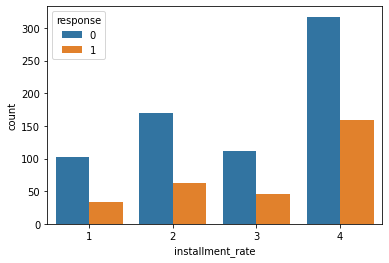

In [50]:
#installment_rate
sns.countplot(x="installment_rate",data=df,hue='response')

<Axes: xlabel='chk_account', ylabel='count'>

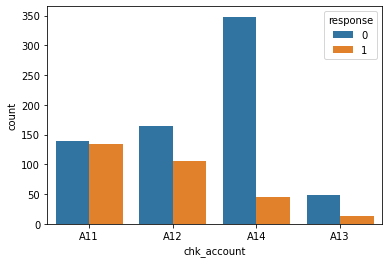

In [51]:
#chk_account
sns.countplot(x="chk_account",data=df,hue='response')

<Axes: xlabel='credit_hist', ylabel='count'>

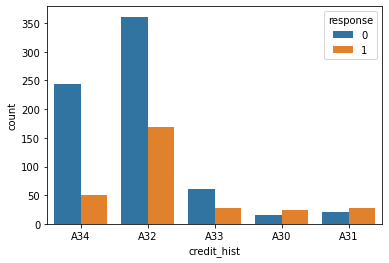

In [52]:
#credit_hist
sns.countplot(x="credit_hist",data=df,hue='response')

<Axes: xlabel='savings_account', ylabel='count'>

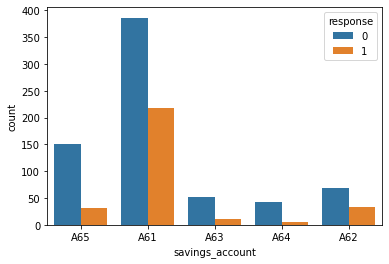

In [53]:
#savings_account
sns.countplot(x="savings_account",data=df,hue='response')

### Build the correlation Matrix 

In [57]:
# Create a copy of the original DataFrame
df_kopy = df.copy()

In [58]:
df_kopy.head()

,chk_account,duration,credit_hist,purpose,credit_amount,savings_account,present_emp,installment_rate,personal_status_sex,other_debtors,...,property,age,other_install,housing,number_credits,job,number_people,telephone,foreign_worker,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [60]:
# Obtain a list of non-numeric columns
non_numeric_columns = df.select_dtypes(exclude='number').columns.tolist()

In [62]:
# Remove non-numeric columns from the DataFrame
df_kopy = df_kopy.drop(non_numeric_columns, axis=1)

In [64]:
# Calculate the correlation matrix
corrMatrix = df_kopy.corr()

In [65]:
# Print the correlation matrix
print(corrMatrix)

                   duration  credit_amount  installment_rate   
duration           1.000000       0.624984          0.074749  \
credit_amount      0.624984       1.000000         -0.271316   
installment_rate   0.074749      -0.271316          1.000000   
present_residence  0.034067       0.028926          0.049302   
age               -0.036136       0.032716          0.058266   
number_credits    -0.011284       0.020795          0.021669   
number_people     -0.023834       0.017142         -0.071207   

                   present_residence       age  number_credits  number_people  
duration                    0.034067 -0.036136       -0.011284      -0.023834  
credit_amount               0.028926  0.032716        0.020795       0.017142  
installment_rate            0.049302  0.058266        0.021669      -0.071207  
present_residence           1.000000  0.266419        0.089625       0.042643  
age                         0.266419  1.000000        0.149254       0.118201  
number_

<Axes: >

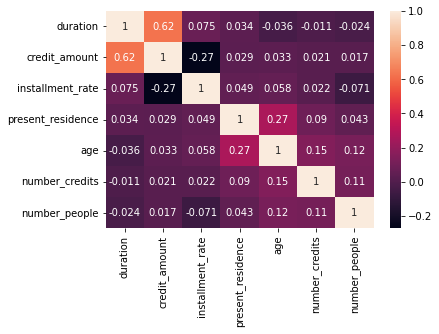

In [66]:
#heatmap
sns.heatmap(corrMatrix,annot=True)

<Axes: xlabel='response', ylabel='age'>

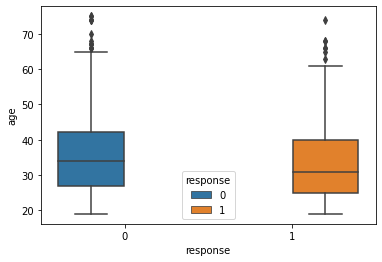

In [70]:
#distribution 
sns.boxplot(x='response',y='age',data=df,hue='response')

<Axes: xlabel='response', ylabel='duration'>

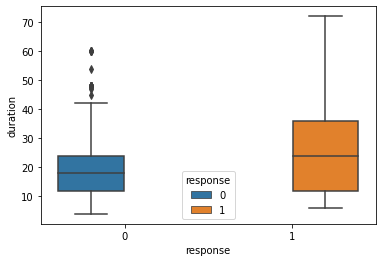

In [71]:
#distribution
sns.boxplot(x='response',y='duration',data=df,hue='response')

## Machine Learning Model Building 

In [72]:
X = df[['age', 'personal_status_sex', 'housing', 'savings_account', 'chk_account', 'duration', 'credit_amount']]
y = df['response']

In [73]:
# format the output fields
df['age'] = df['age'].apply(str)
df['personal_status_sex'] = df['personal_status_sex'].apply(str)
df['housing'] = df['housing'].apply(str)
df['savings_account'] = df['savings_account'].apply(str)
df['chk_account'] = df['chk_account'].apply(str)

In [74]:
df['age'] = df['age'].astype(int)
df['credit_amount'] = df['credit_amount'].astype(int)
df['duration'] = df['duration'].astype(int)

#### Perform of the string values into factor | One-Hot encoding

In [80]:
df.head()

,chk_account,duration,credit_hist,purpose,credit_amount,savings_account,present_emp,installment_rate,personal_status_sex,other_debtors,...,property,age,other_install,housing,number_credits,job,number_people,telephone,foreign_worker,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


#### One-Hot-Enconder

In [81]:
from sklearn.preprocessing import OneHotEncoder

In [86]:
# Text Columns data frame 
text_columns = list(X.columns[X.dtypes == 'object'])
print("Text Columns", text_columns)

Text Columns ['personal_status_sex', 'housing', 'savings_account', 'chk_account']


In [88]:
# Numeric columns data frame 
num_cols = list(X.columns[X.dtypes != 'object'])
print("Numerical Columns", num_cols)

Numerical Columns ['age', 'duration', 'credit_amount']


#### Dummies variable 

In [89]:
x_dummy = pd.get_dummies(X[text_columns],drop_first=True)

In [91]:
#modeling porpuse
x_new = pd.concat([x_dummy,X[num_cols]], axis=1,join='inner')

### train & test dataset 

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test = train_test_split(x_new,y,test_size=.3,random_state=123)

### Logiistic Regression Model

In [94]:
#logisticRegression
from sklearn.linear_model import LogisticRegression

#### initiate the ML model

In [95]:
logreg = LogisticRegression()

#### fit the model

In [98]:
logreg.fit(X_train,y_train)

LogisticRegression()

#### predict and check the score of the model

In [99]:
y_pred = logreg.predict(X_test)

#### accuracy_score

In [104]:
from sklearn.metrics import accuracy_score

In [107]:
accuracy_score(y_test,y_pred)

0.7166666666666667

### RandomForest Model

In [109]:
from sklearn.ensemble import RandomForestClassifier

#### Initiate the model 

In [110]:
rfc = RandomForestClassifier()

In [111]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
y_rfc_pred = rfc.predict(X_test)

In [113]:
accuracy_score(y_test,y_rfc_pred)

0.72

### Concluding and Presenting Findings

##### The standard way to conclude and present the finding to end user is like:

* Business Problem

* Findings from dataset

* Model Used

* Accuracy Scores

* Recommendations